In [ ]:
#Sachin Saigal
#115356160
#MSML 651 final project code
#follow the steps from 1-1-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy as sp
import seaborn as sns
import requests
import random
import io
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dask.dataframe as dd
import pandas as pd
from datetime import datetime, date, time, timedelta
import time
import numpy as np
import re
import pickle
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import plot_importance

from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
#Step 1: This imports the df from the csv,

#For a new town predictions repeat from step 1 and change town in step 4

import sys
file_name = '/content/drive/MyDrive/Real_Estate_Sales_2001-2020_GL_new3.csv'
file = open(file_name)

# creates master dataframe (df) and prints out the head to check if populated correctly.
df = pd.read_csv(file_name)
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Ratio
0,10142,2001,7/31/2002,Woodbridge,238 PECK HL RD,98770,699900.0,708.615976
1,70129,2007,11/29/2007,Hartford,230 FARMINGTON AVE #F1,6351,45000.0,708.549835
2,60337,2006,9/14/2007,East Hampton,37 BLUE HERON DR,80890,573145.0,708.548646
3,40073,2004,10/22/2004,West Hartford,64 EMILY WAY,63000,446337.0,708.471429
4,80515,2008,7/10/2009,Manchester,60 TUFTS DRIVE,86400,612000.0,708.333333


In [ ]:
#Step 2 creates the town list need for the code and automation
towns =df['Town'].unique().tolist() #lists all the unique towns in list
print(len(towns))
print(towns)

170
['Woodbridge', 'Hartford', 'East Hampton', 'West Hartford', 'Manchester', 'Stamford', 'Suffield', 'Putnam', 'Norwich', 'Guilford', 'Watertown', 'Plainville', 'Cheshire', 'Coventry', 'Enfield', 'Rocky Hill', 'Lebanon', 'Montville', 'Naugatuck', 'Madison', 'Brookfield', 'Vernon', 'Newtown', 'East Haddam', 'Shelton', 'Burlington', 'Wolcott', 'Danbury', 'East Lyme', 'Lisbon', 'North Branford', 'Colchester', 'Middletown', 'New Milford', 'Seymour', 'Ridgefield', 'Oxford', 'Granby', 'Killingly', 'Derby', 'Windsor', 'Groton', 'Killingworth', 'Simsbury', 'Glastonbury', 'Branford', 'Windham', 'Ledyard', 'Monroe', 'Tolland', 'Avon', 'Ellington', 'Norwalk', 'Durham', 'Berlin', 'South Windsor', 'Wilton', 'Thompson', 'Kent', 'Bridgeport', 'Sterling', 'Bristol', 'Windsor Locks', 'Farmington', 'Stratford', 'Pomfret', 'North Canaan', 'Meriden', 'New Haven', 'Canton', 'North Haven', 'Hamden', 'Southbury', 'Hebron', 'Westport', 'Bethel', 'Southington', 'Essex', 'Wallingford', 'Old Saybrook', 'Newingt

In [ ]:
#Step 3 creates new feature month, quarter, year and adds it to the town_df,
def create_features(town_df):
  town_df.copy()
  town_df['month']=town_df.index.month
  town_df['quarter']=town_df.index.quarter
  town_df['year']=town_df.index.year
  return town_df

In [ ]:
#Step 4 issolates the town, with this step it important to get the correct spelling and caplization of the town on the following lines
# this is what the model picks which towns data it will use and can run different models if you change the df.town == '----' line
town_df = df.loc[df.Town =='Norwich'] #select a new town here
town_df.set_index('Date Recorded')
town_df.index = pd.to_datetime(town_df['Date Recorded'])

# creates train and test dataset
train =town_df.loc[town_df.index < '01-01-2018']
test =town_df.loc[town_df.index >= '01-01-2018']




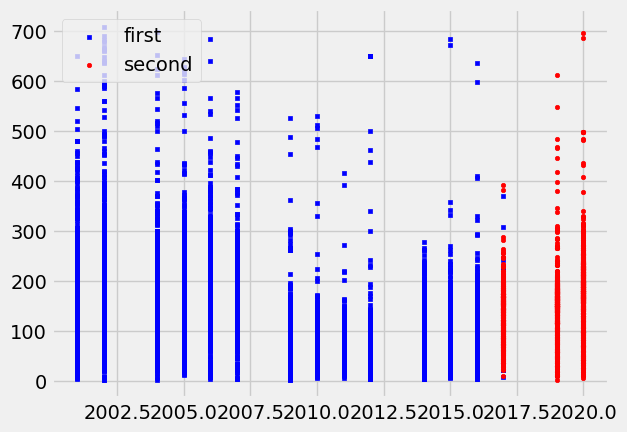

In [ ]:
#Step 5 # Data visulation
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train['List Year'], train['Ratio'], s=10, c='b', marker="s", label='first')
ax1.scatter(test['List Year'], test['Ratio'], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Step 6 is important for training, this is where it calls the create feature method of step 3
train = create_features(train)
test = create_features(test)

<ipython-input-22-aa872bcc0694>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_df['month']=town_df.index.month
<ipython-input-22-aa872bcc0694>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_df['quarter']=town_df.index.quarter
<ipython-input-22-aa872bcc0694>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

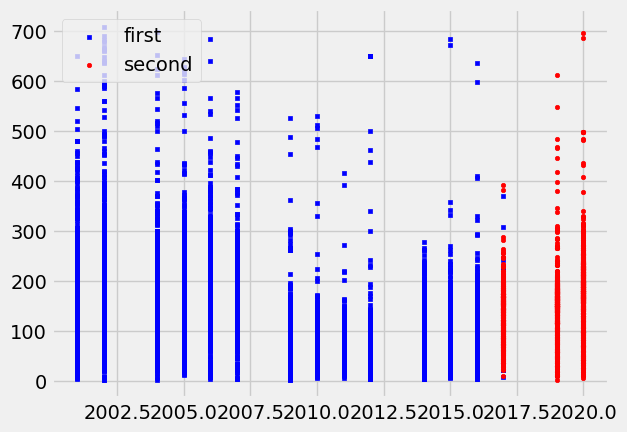

In [ ]:
#Step 7 # Data visulation
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train['List Year'], train['Ratio'], s=10, c='b', marker="s", label='first')
ax1.scatter(test['List Year'], test['Ratio'], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.show()

<Axes: xlabel='year', ylabel='Ratio'>

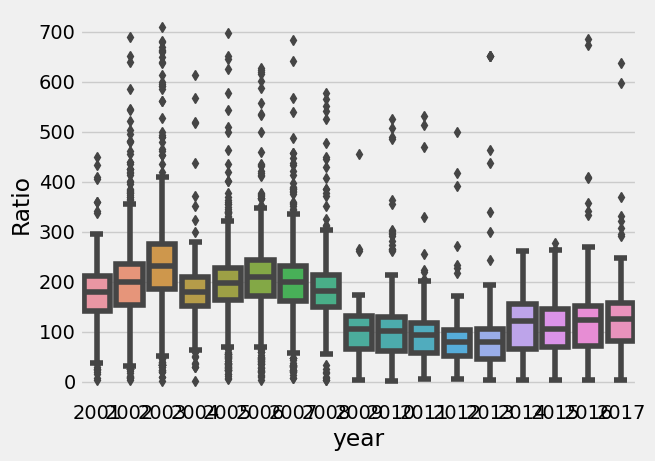

In [ ]:
#Step 7.1 # Data visulation
train.head()
sns.boxplot(data=train, x='year', y='Ratio')

<Axes: xlabel='month', ylabel='Ratio'>

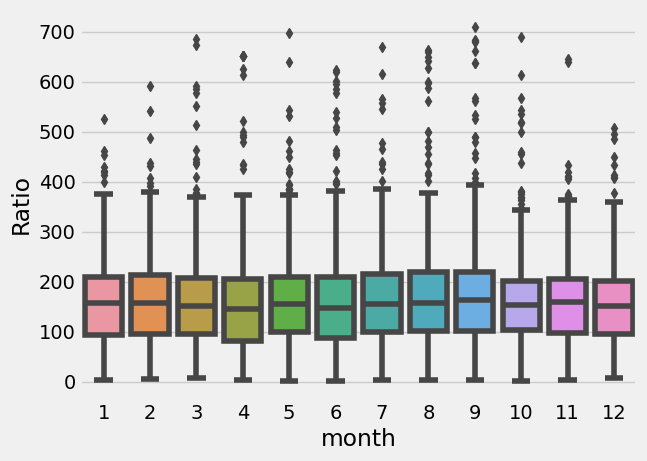

In [ ]:
#Step 7.2 # Data visulation
sns.boxplot(data=train, x='month', y='Ratio')

<Axes: xlabel='quarter', ylabel='Ratio'>

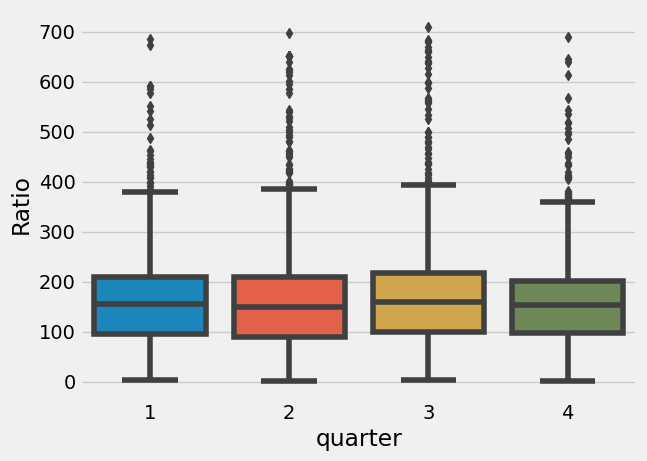

In [ ]:
#Step 7.3 # Data visulation
sns.boxplot(data=train, x='quarter', y='Ratio')

In [ ]:
#Step 8 populates features with elements and labels need for training
FEATURES = ['quarter', 'month', 'year']
TARGET = 'Ratio'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
#Step 9 calls the xgb regressor for the time series prediciton
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    #booster type is a gradiant boosted decision tree.
                       n_estimators=2000,                   # limit of 1000 estimaters, will terminate training after it reaches 1000
                       early_stopping_rounds=50,            # if the training does not improve after 50 tries it will also terminate
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],    #evaluation portion that uses RMSE to evaluate training and test subset data and prints results
        verbose=100)

[0]	validation_0-rmse:179.29423	validation_1-rmse:165.58953
[100]	validation_0-rmse:94.07988	validation_1-rmse:101.65783


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:21:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:75.45369	validation_1-rmse:83.32879
[300]	validation_0-rmse:72.44140	validation_1-rmse:77.45698
[400]	validation_0-rmse:71.90519	validation_1-rmse:75.60794
[500]	validation_0-rmse:71.76894	validation_1-rmse:74.95251
[600]	validation_0-rmse:71.71673	validation_1-rmse:74.57441
[700]	validation_0-rmse:71.68713	validation_1-rmse:74.42539
[800]	validation_0-rmse:71.66412	validation_1-rmse:74.34257
[900]	validation_0-rmse:71.64546	validation_1-rmse:74.25380
[999]	validation_0-rmse:71.62970	validation_1-rmse:74.19780


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

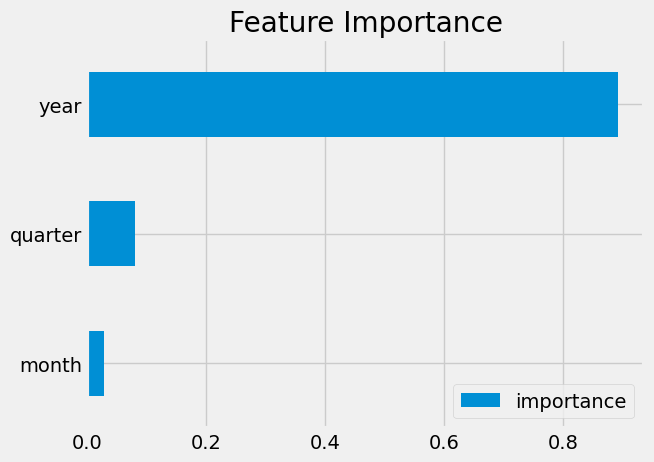

In [ ]:
#Step 9.1 plots the which feature was the most important one it came to the model. which is shown on a graph
fitting = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fitting.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()



<ipython-input-35-e567e9535f55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


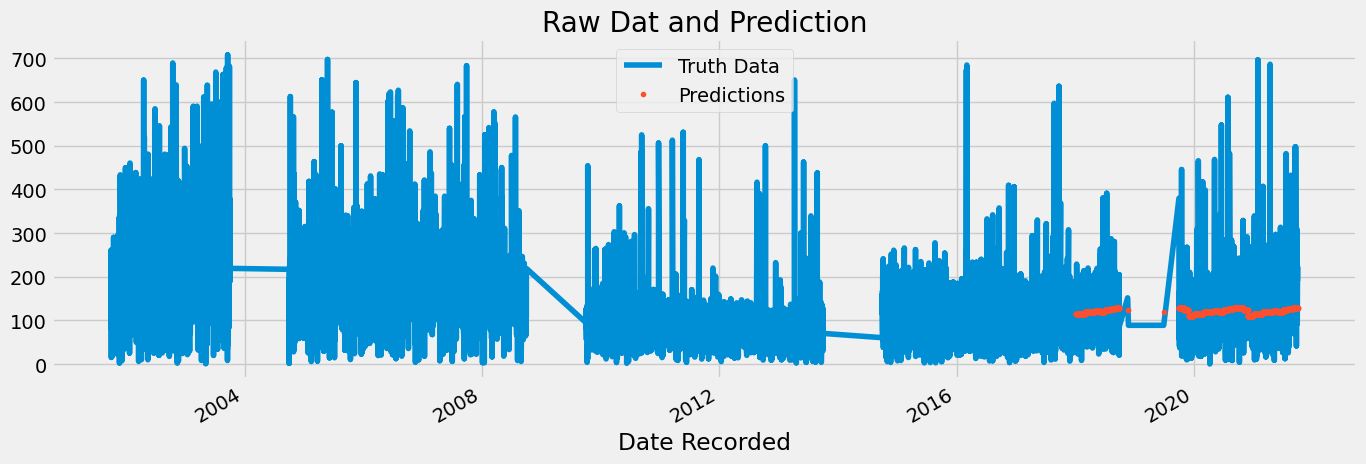

In [ ]:
#Step 10 merges prediciton back into the data frame and graphs both the raw data and prediction data

#For a new town predictions repeat from step 1 and change town in step 4
test['prediction'] = reg.predict(X_test)
df = town_df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = town_df[['Ratio']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['Data', 'Predictions'])
ax.set_title('Test data and Predictions')
plt.show()